In [1]:
!pip install pycaret

     |████████████████████████████████| 188 kB 12.6 MB/s eta 0:00:01
     |████████████████████████████████| 142.8 MB 33 kB/s s eta 0:00:01
     |████████████████████████████████| 93 kB 508 kB/s  eta 0:00:01
     |████████████████████████████████| 7.0 MB 51.2 MB/s eta 0:00:01
     |████████████████████████████████| 7.3 MB 69.6 MB/s eta 0:00:01
     |████████████████████████████████| 63.9 MB 9.7 kB/s  eta 0:00:01
     |████████████████████████████████| 1.6 MB 42.4 MB/s eta 0:00:01
     |████████████████████████████████| 69 kB 11.4 MB/s eta 0:00:01
     |████████████████████████████████| 636 kB 66.7 MB/s eta 0:00:01
     |████████████████████████████████| 24.2 MB 46.8 MB/s eta 0:00:01
     |████████████████████████████████| 81 kB 11.0 MB/s eta 0:00:01
     |████████████████████████████████| 1.2 MB 44.8 MB/s eta 0:00:01
     |████████████████████████████████| 364 kB 65.7 MB/s eta 0:00:01
     |████████████████████████████████| 127 kB 77.9 MB/s eta 0:00:01
     |███████████████████████████

     |████████████████████████████████| 234 kB 62.6 MB/s eta 0:00:01


  Created wheel for pyod: filename=pyod-0.8.1-py3-none-any.whl size=105651 sha256=59f66904dedf6f2d037d18d399b42c6cac7c66b2bacc26c47827a3c574c5a4f4
  Stored in directory: /home/ec2-user/.cache/pip/wheels/d3/ba/8b/dd414a41f1d8effbc9a0937f0a7569c986525e34f9c27272eb
  Created wheel for pyLDAvis: filename=pyLDAvis-2.1.2-py2.py3-none-any.whl size=97711 sha256=48fb5f31ca68a4f2722d80d4fd1a14ab735f2475e831bca89043a92b4ec79238
  Stored in directory: /home/ec2-user/.cache/pip/wheels/57/de/11/0a038be70c2c212ce45fa0f4f9da165bb5dd87de1288394dc3
  Created wheel for umap-learn: filename=umap_learn-0.4.6-py3-none-any.whl size=67950 sha256=5d01ccdf58f7e7ad110957e3dd3455841a136e7d4198e1599048074000d32258
  Stored in directory: /home/ec2-user/.cache/pip/wheels/22/ce/3d/75f6600b4d93c851021aceeec51b7b330c0ad4d9692e69be6a
  Created wheel for cufflinks: filename=cufflinks-0.17.0-py3-none-any.whl size=67743 sha256=504c0814a2bf33bbd5e4c53299f00c51b757c30a7441014e7c55c8e1fbfe761c
  Stored in directory: /home/ec2

You should consider upgrading via the '/home/ec2-user/anaconda3/envs/pytorch_p36/bin/python -m pip install --upgrade pip' command.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pycaret.classification import * 

- Class
- Number of times pregnant
- Plasma glucose concentration a 2 hours in an oral glucose tolerance test
- Diastolic blood pressure (mm Hg)
- Triceps skin fold thickness (mm)
- 2-Hour serum insulin (mu U/ml)
- Body mass index (weight in kg/(height in m)^2)
- Diabetes pedigree function
- Age (years)

In [3]:
url="https://rioultf.users.greyc.fr/uci/files/pima-indians-diabetes/pima-indians-diabetes.csv"

In [4]:
df=pd.read_csv(url,header=None,names=['Diabetic','pregnancies','glucose','press','skin','insulin','bmi',
                                         'function','age'])

In [5]:
df

,Diabetic,pregnancies,glucose,press,skin,insulin,bmi,function,age
0,1,6,148,72,35,0,33.6,0.627,50
1,0,1,85,66,29,0,26.6,0.351,31
2,1,8,183,64,0,0,23.3,0.672,32
3,0,1,89,66,23,94,28.1,0.167,21
4,1,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...,...
763,0,10,101,76,48,180,32.9,0.171,63
764,0,2,122,70,27,0,36.8,0.340,27
765,0,5,121,72,23,112,26.2,0.245,30
766,1,1,126,60,0,0,30.1,0.349,47


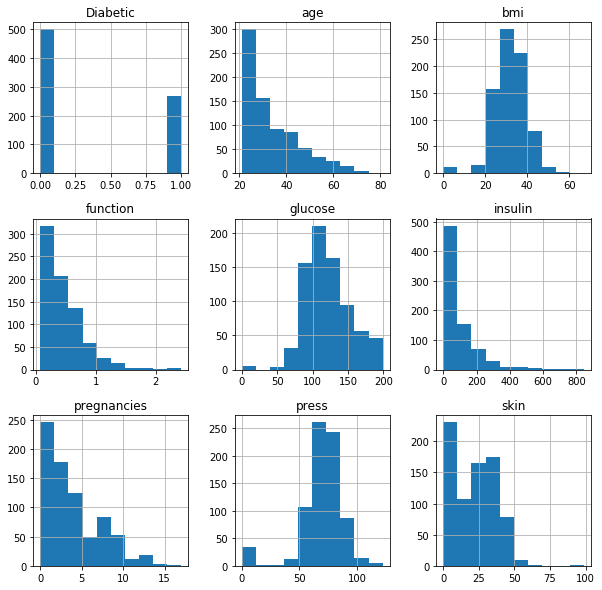

In [6]:
df.hist(figsize=(10,10));

Revisaría cómo mejoras asimetría de ```age```, ```function```, ```insulin```, ```pregnancies```, ```skin```.

In [7]:
df.min()

Diabetic        0.000
pregnancies     0.000
glucose         0.000
press           0.000
skin            0.000
insulin         0.000
bmi             0.000
function        0.078
age            21.000
dtype: float64

In [8]:
cols_asim=['age','function']

In [9]:
from scipy import stats
from scipy.special import boxcox, inv_boxcox

In [10]:
df_mod=df

In [11]:
fitted_lambdas=[]
for col in cols_asim:
    y, fitted_lambda = stats.boxcox(df_mod[col]+1e-6)
    fitted_lambdas.append(fitted_lambda)
    df_mod[col]=y

In [12]:
df_mod

,Diabetic,pregnancies,glucose,press,skin,insulin,bmi,function,age
0,1,6,148,72,35,0,33.6,-0.474864,0.901092
1,0,1,85,66,29,0,26.6,-1.088079,0.892411
2,1,8,183,64,0,0,23.3,-0.403328,0.893138
3,0,1,89,66,23,94,28.1,-1.912131,0.881083
4,1,0,137,40,35,168,43.1,0.803134,0.893820
...,...,...,...,...,...,...,...,...,...
763,0,10,101,76,48,180,32.9,-1.885175,0.903915
764,0,2,122,70,27,0,36.8,-1.122492,0.888932
765,0,5,121,72,23,112,26.2,-1.481352,0.891632
766,1,1,126,60,0,0,30.1,-1.094249,0.900208


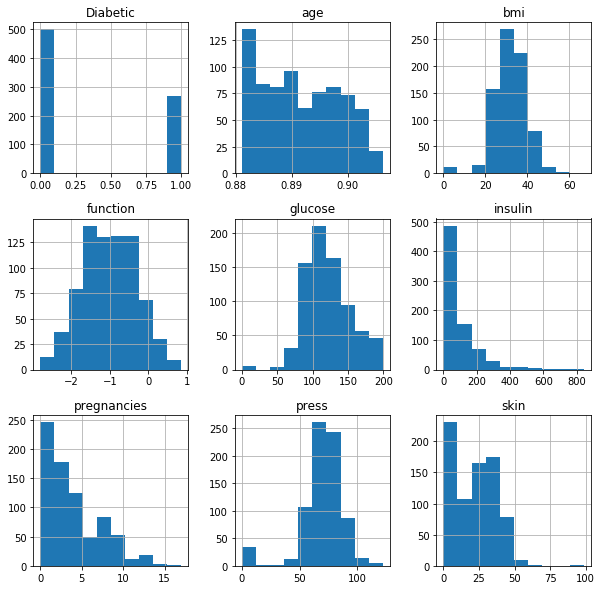

In [13]:
df_mod.hist(figsize=(10,10));

In [14]:
exp_clas= setup(data = df_mod,target = 'Diabetic',train_size=0.8)

 
Setup Succesfully Completed!


,Description,Value
0,session_id,5874
1,Target Type,Binary
2,Label Encoded,None
3,Original Data,"(768, 9)"
4,Missing Values,False
5,Numeric Features,7
6,Categorical Features,1
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [15]:
compare_models(sort='F1')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,Extreme Gradient Boosting,0.772200,0.832600,0.622500,0.696600,0.656100,0.486800
1,CatBoost Classifier,0.768900,0.833700,0.617300,0.694300,0.651800,0.479800
2,Gradient Boosting Classifier,0.767300,0.831900,0.617300,0.695200,0.651000,0.477400
3,Ada Boost Classifier,0.759000,0.804400,0.617100,0.677400,0.641100,0.461000
4,Linear Discriminant Analysis,0.762300,0.817900,0.569900,0.697400,0.625100,0.453900
5,Logistic Regression,0.765600,0.814600,0.542400,0.725000,0.619300,0.454400
6,Ridge Classifier,0.765600,0.000000,0.537400,0.725400,0.615500,0.452200
7,Light Gradient Boosting Machine,0.738000,0.801700,0.593900,0.634300,0.611500,0.414500
8,Extra Trees Classifier,0.752500,0.787300,0.523600,0.695900,0.595900,0.422700
9,Random Forest Classifier,0.752600,0.792900,0.514300,0.706400,0.592400,0.420900


In [16]:
tuned_cb=tune_model('catboost',optimize='F1',n_iter=50,fold=5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.7642,0.8392,0.5814,0.6944,0.6329,0.4613
1,0.7236,0.7901,0.5581,0.6154,0.5854,0.3788
2,0.7236,0.7689,0.5814,0.6098,0.5952,0.3855
3,0.7642,0.8131,0.5814,0.6944,0.6329,0.4613
4,0.8361,0.9057,0.6667,0.8235,0.7368,0.6197
Mean,0.7623,0.8234,0.5938,0.6875,0.6367,0.4613
SD,0.0411,0.0473,0.0375,0.0773,0.0537,0.0868


In [17]:
tuned_xg=tune_model('xgboost',optimize='F1',n_iter=50,fold=5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.7642,0.8363,0.5814,0.6944,0.6329,0.4613
1,0.7154,0.7884,0.4651,0.6250,0.5333,0.3349
2,0.7398,0.7616,0.5581,0.6486,0.6000,0.4088
3,0.7480,0.8352,0.6279,0.6429,0.6353,0.4428
4,0.7869,0.8586,0.6905,0.6905,0.6905,0.5280
Mean,0.7509,0.8160,0.5846,0.6603,0.6184,0.4352
SD,0.0239,0.0355,0.0749,0.0274,0.0515,0.0634


In [18]:
tuned_gb=tune_model('gbc',optimize='F1',n_iter=50,fold=5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.7398,0.8378,0.5581,0.6486,0.6000,0.4088
1,0.7480,0.8073,0.5814,0.6579,0.6173,0.4305
2,0.7236,0.7451,0.5349,0.6216,0.5750,0.3719
3,0.7886,0.8177,0.6047,0.7429,0.6667,0.5143
4,0.8525,0.8896,0.6905,0.8529,0.7632,0.6577
Mean,0.7705,0.8195,0.5939,0.7048,0.6444,0.4766
SD,0.0462,0.0468,0.0536,0.0845,0.0665,0.1019


In [19]:
blended=blend_models([tuned_xg,tuned_gb])

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.7258,0.0,0.4545,0.6667,0.5405,0.3550
1,0.7419,0.0,0.5455,0.6667,0.6000,0.4123
2,0.7419,0.0,0.4091,0.7500,0.5294,0.3722
3,0.6613,0.0,0.3636,0.5333,0.4324,0.2032
4,0.7541,0.0,0.4286,0.7500,0.5455,0.3936
5,0.8033,0.0,0.6190,0.7647,0.6842,0.5436
6,0.8033,0.0,0.5238,0.8462,0.6471,0.5209
7,0.7213,0.0,0.4762,0.6250,0.5405,0.3457
8,0.8197,0.0,0.6667,0.7778,0.7179,0.5866
9,0.8525,0.0,0.6667,0.8750,0.7568,0.6536


In [20]:
X_train=df.iloc[:,1:]

In [21]:
predict_model(blended)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,Voting Classifier,0.7662,0,0.5185,0.7368,0.6087,0.4491


,glucose,press,skin,insulin,bmi,function,age,pregnancies_0,pregnancies_1,pregnancies_10,...,pregnancies_2,pregnancies_3,pregnancies_4,pregnancies_5,pregnancies_6,pregnancies_7,pregnancies_8,pregnancies_9,Diabetic,Label
0,129.0,86.0,20.0,270.0,35.1,-1.546705,0.884176,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0
1,138.0,74.0,26.0,144.0,36.1,-0.597887,0.901092,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1
2,146.0,78.0,0.0,0.0,38.5,-0.669809,0.904554,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1,1
3,79.0,60.0,42.0,48.0,43.5,-0.394180,0.884176,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
4,100.0,84.0,33.0,105.0,30.0,-0.736587,0.899886,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149,114.0,88.0,0.0,0.0,27.8,-1.472344,0.904402,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,0
150,129.0,92.0,49.0,155.0,36.4,-0.032561,0.893138,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1
151,132.0,78.0,0.0,0.0,32.4,-0.966567,0.881083,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
152,164.0,78.0,0.0,0.0,32.8,-2.050406,0.899549,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,1


In [22]:
predict_model(tuned_cb)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,CatBoost Classifier,0.7532,0.8363,0.6296,0.6538,0.6415,0.4535


,glucose,press,skin,insulin,bmi,function,age,pregnancies_0,pregnancies_1,pregnancies_10,...,pregnancies_3,pregnancies_4,pregnancies_5,pregnancies_6,pregnancies_7,pregnancies_8,pregnancies_9,Diabetic,Label,Score
0,129.0,86.0,20.0,270.0,35.1,-1.546705,0.884176,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0,0.2541
1,138.0,74.0,26.0,144.0,36.1,-0.597887,0.901092,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,0.7413
2,146.0,78.0,0.0,0.0,38.5,-0.669809,0.904554,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1,1,0.6951
3,79.0,60.0,42.0,48.0,43.5,-0.394180,0.884176,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.2423
4,100.0,84.0,33.0,105.0,30.0,-0.736587,0.899886,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.4689
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149,114.0,88.0,0.0,0.0,27.8,-1.472344,0.904402,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,0,0.2564
150,129.0,92.0,49.0,155.0,36.4,-0.032561,0.893138,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,0.8611
151,132.0,78.0,0.0,0.0,32.4,-0.966567,0.881083,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0.5014
152,164.0,78.0,0.0,0.0,32.8,-2.050406,0.899549,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,1,0.6308


In [23]:
finalize_model(blended)

VotingClassifier(estimators=[('Extreme Gradient Boosting_0',
                              XGBClassifier(base_score=0.5, booster='gbtree',
                                            colsample_bylevel=1,
                                            colsample_bynode=1,
                                            colsample_bytree=0.5, gamma=0,
                                            learning_rate=0.12,
                                            max_delta_step=0, max_depth=100,
                                            min_child_weight=1, missing=None,
                                            n_estimators=100, n_jobs=-1,
                                            nthread=None,
                                            objective='binary:logistic',
                                            random_state=5874, reg_alpha=...
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_spl

In [24]:
finalize_model(tuned_cb)

In [25]:
y_pred_blended=predict_model(blended,data=X_train).iloc[:,-1]

In [26]:
y_pred_blended

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    0
767    0
Name: Label, Length: 768, dtype: int64

In [27]:
y_pred_cb=predict_model(tuned_cb,data=X_train).iloc[:,-2]

In [28]:
y_pred_cb

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    0
767    0
Name: Label, Length: 768, dtype: int64

In [29]:
from sklearn.metrics import confusion_matrix

In [31]:
y_real=df.iloc[:,0]

In [32]:
confusion_matrix(y_real,y_pred_blended)

array([[490,  10],
       [ 68, 200]])

In [33]:
confusion_matrix(y_real,y_pred_cb)

array([[451,  49],
       [ 77, 191]])